In [8]:
install.packages("ggplot2",repos="https://cran.r-project.org")

also installing the dependency 'scales'



package 'scales' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpCS3rWN\downloaded_packages


In [42]:
library("ggplot2")

In [43]:
gjb<-read.csv("gjb.csv")
names(gjb)


[1] "ï..psraid"  "sample"     "int_date"   "lang"       "usr"       
  [6] "cregion"    "state"      "form"       "sex"        "q1"        
 [11] "q3"         "eminuse"    "intmob"     "intfreq"    "home4nw"   
 [16] "bbhome1"    "bbhome2"    "bbhome3a"   "bbhome3b"   "bbhome3c"  
 [21] "bbhome3d"   "bbhome3e"   "device1a"   "smart1"     "q4"        
 [26] "bbsmart1"   "bbsmart2"   "bbsmart3a"  "bbsmart3b"  "bbsmart3c" 
 [31] "bbsmart3d"  "bbsmart3e"  "bbsmart3f"  "bbsmart4"   "cable1"    
 [36] "cable2"     "cable3a"    "cable3b"    "cable3c"    "act19"     
 [41] "act87a"     "act87b"     "act137"     "q5a"        "q5b"       
 [46] "q5c"        "q5d"        "q5e"        "q5f"        "date1a"    
 [51] "date2a"     "date3a"     "date3b"     "date4a"     "date4b"    
 [56] "date4c"     "date4d"     "date4e"     "date4f"     "game1"     
 [61] "game2a"     "game2b"     "game2c"     "game2d"     "game2e"    
 [66] "game2f"     "game3a"     "game3b"     "game4"      "emplnw"    
 [71] "emptype1"   "emptype2"   "emptype3"   "stud"       "job1a"     
 [76] "job1b"      "job1c"      "job1d"      "job1e"      "job1f"     
 [81] "job2"       "job3a"      "job3b"      "job3c"      "job3d"     
 [86] "job3e"      "job3f"      "job3g"      "job3h"      "job4"      
 [91] "smjob1"     "smjob2a"    "smjob2b"    "smjob2c"    "smjob2d"   
 [96] "smjob2e"    "smjob3"     "smjob4a"    "smjob4b"    "smjob4c"   
[101] "smjob4d"    "smjob4e"    "snsjob1a"   "snsjob1b"   "snsjob1c"  
[106] "snsjob2a"   "snsjob2b"   "job5a"      "job5b"      "job5c"     
[111] "job5d"      "auto1a"     "auto1b"     "auto1c"     "auto1d"    
[116] "auto1e"     "auto2"      "auto3"      "age"        "marital"   
[121] "hh1"        "par"        "kidage1"    "kidage2"    "kidage3"   
[126] "educ2"      "edinst"     "disa"       "party"      "partyln"   
[131] "ideo"       "hisp"       "birth_hisp" "race"       "inc"       
[136] "ql1a"       "qc1"        "zipcode"    "weight"     "standwt"

# Selecting 5 different variables from the dataset that makes sense and are related to each other 

In [44]:
#data<-subset(gjb,c("EMPLNW","EMPTYPE1","EMPTYPE2","EMPTYPE3","STUD"))
nam<-names(gjb) %in% c("state","emptype1","inc","educ2","age")


# Cleaning of data
## Removing nas

In [45]:
data<-na.omit(gjb[nam])
head(data)


state emptype1 age educ2 inc
4  37    1        40  5      6 
6  20    5        69  6      8 
13 27    2        52  4      8 
15 45    8        43  6     98 
16  1    1        44  4      7 
20  1    2        58  6      7

# Removing all the Outliers and noise data

In [46]:
data2<-subset(data,data$emptype1!=99 & data$emptype1!=98 & data$educ2!=98 & data$educ2!=99 & data$inc!=99 & data$inc!=98)

# Performing K means without Normalizing and with Normalizing

## Without Normalizing we get

In [47]:
km2<-kmeans(data2,3)
km2

K-means clustering with 3 clusters of sizes 360, 277, 344

Cluster means:
     state emptype1      age    educ2      inc
1 10.71667 2.897222 40.77500 5.236111 5.580556
2 41.11552 2.888087 29.99639 5.050542 5.209386
3 36.10756 3.095930 57.52616 5.386628 6.252907

Clustering vector:
   4    6   13   16   20   21   24   30   33   34   36   43   44   45   49   50 
   2    3    3    1    1    2    3    3    1    2    2    3    1    3    3    3 
  51   55   57   58   60   65   72   73   77   83   84   87   88   89   91   92 
   2    2    3    3    2    3    3    3    3    1    3    2    1    1    1    3 
  94  101  104  107  108  109  111  117  131  133  141  143  147  148  151  157 
   2    3    1    3    3    3    3    1    2    1    3    3    2    1    3    2 
 160  161  162  167  172  183  184  196  199  206  209  213  216  217  218  221 
   1    3    3    2    3    1    3    2    3    3    3    3    3    3    3    3 
 228  232  233  236  237  238  242  247  251  252  254  255  258  266 

# K means with 3 clusters and plotting

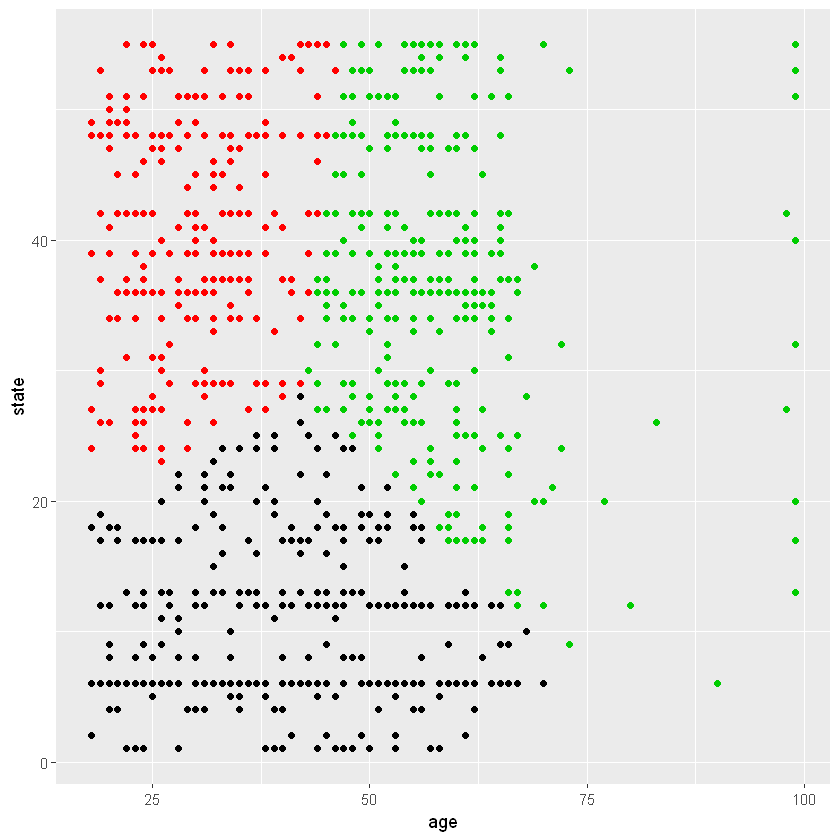

In [48]:
ggplot(data2,aes(x=age,y=state))+geom_point(color=km2$cluster)

In [49]:
km25<-kmeans(data2,5)
km25

K-means clustering with 5 clusters of sizes 212, 15, 229, 252, 273

Cluster means:
     state emptype1      age    educ2      inc
1 12.65094 2.872642 29.82075 4.882075 4.867925
2 31.26667 2.733333 94.46667 5.066667 6.800000
3 42.32751 2.847162 29.23581 5.034934 5.253275
4 14.21032 3.075397 53.90476 5.488095 6.265873
5 41.18315 3.043956 54.06227 5.457875 6.179487

Clustering vector:
   4    6   13   16   20   21   24   30   33   34   36   43   44   45   49   50 
   3    4    4    4    4    3    5    4    1    3    5    4    1    4    4    5 
  51   55   57   58   60   65   72   73   77   83   84   87   88   89   91   92 
   3    3    5    4    5    5    4    5    4    4    5    3    4    4    4    5 
  94  101  104  107  108  109  111  117  131  133  141  143  147  148  151  157 
   3    4    4    5    5    4    5    1    3    4    4    5    5    4    5    3 
 160  161  162  167  172  183  184  196  199  206  209  213  216  217  218  221 
   4    5    4    3    5    4    5    3    5    

# K means with 5 clusters and Plotting with 5 Clusters

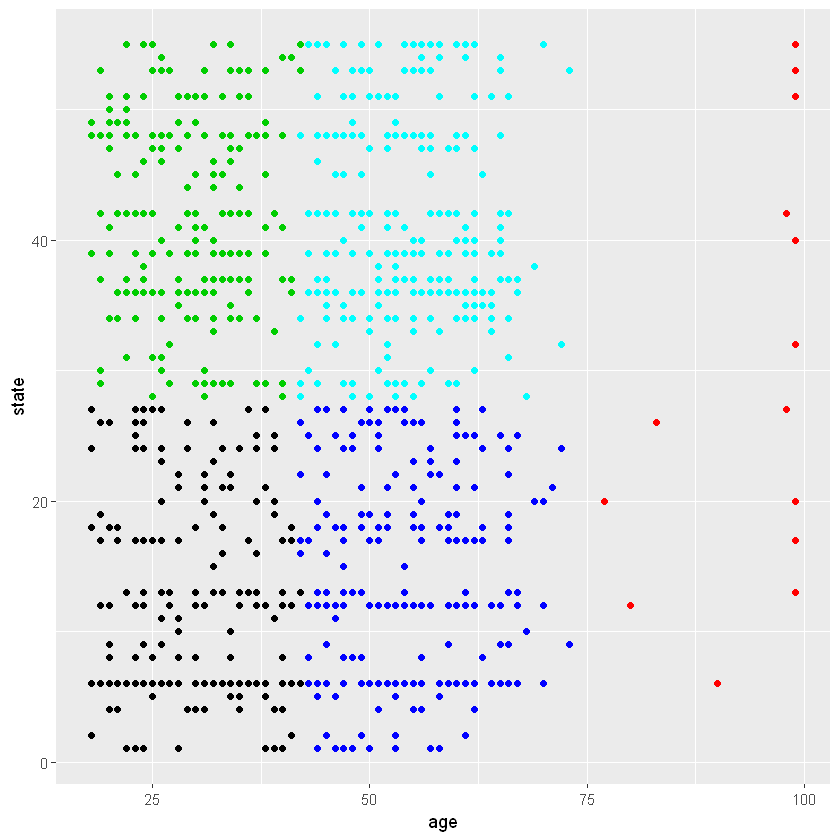

In [50]:
ggplot(data2,aes(x=age,y=state))+geom_point(color=km25$cluster)

In [51]:
data<-subset(data,data$emptype1!=99 & data$emptype1!=98 & data$educ2!=98 & data$educ2!=99 & data$inc!=99 & data$inc!=98)

In [52]:
unique(data$educ2)

[1] 5 6 4 3 8 7 2 1

# Cleaning and Normalizing the data so that all the values are in the range 0 to 1

In [53]:
data$state<-(data$state-min(data$state))/(max(data$state)-min(data$state))
data$emptype1<-(data$emptype1-min(data$emptype1))/(max(data$emptype1)-min(data$emptype1))
data$age<-(data$age-min(data$age))/(max(data$age)-min(data$age))
data$educ2<-(data$educ2-min(data$educ2))/(max(data$educ2)-min(data$educ2))
data$inc<-(data$inc-min(data$inc))/(max(data$inc)-min(data$inc))

# Performing K means algorithms by taking number of clusters as 3

In [54]:
km<-kmeans(data,3)
km

K-means clustering with 3 clusters of sizes 302, 370, 309

Cluster means:
      state  emptype1       age     educ2       inc
1 0.2273117 0.3420057 0.3639114 0.7464522 0.7396523
2 0.7604605 0.2915058 0.3367367 0.6845560 0.7381757
3 0.4666187 0.2075821 0.2447161 0.3721683 0.2629450

Clustering vector:
   4    6   13   16   20   21   24   30   33   34   36   43   44   45   49   50 
   2    1    2    1    1    3    2    1    3    3    2    1    3    1    1    2 
  51   55   57   58   60   65   72   73   77   83   84   87   88   89   91   92 
   2    2    2    3    2    2    3    2    2    1    2    3    1    1    3    3 
  94  101  104  107  108  109  111  117  131  133  141  143  147  148  151  157 
   2    3    1    2    2    1    2    1    3    1    1    2    2    3    3    2 
 160  161  162  167  172  183  184  196  199  206  209  213  216  217  218  221 
   1    2    1    2    2    1    2    2    2    1    1    3    1    3    2    2 
 228  232  233  236  237  238  242  247  251  252 

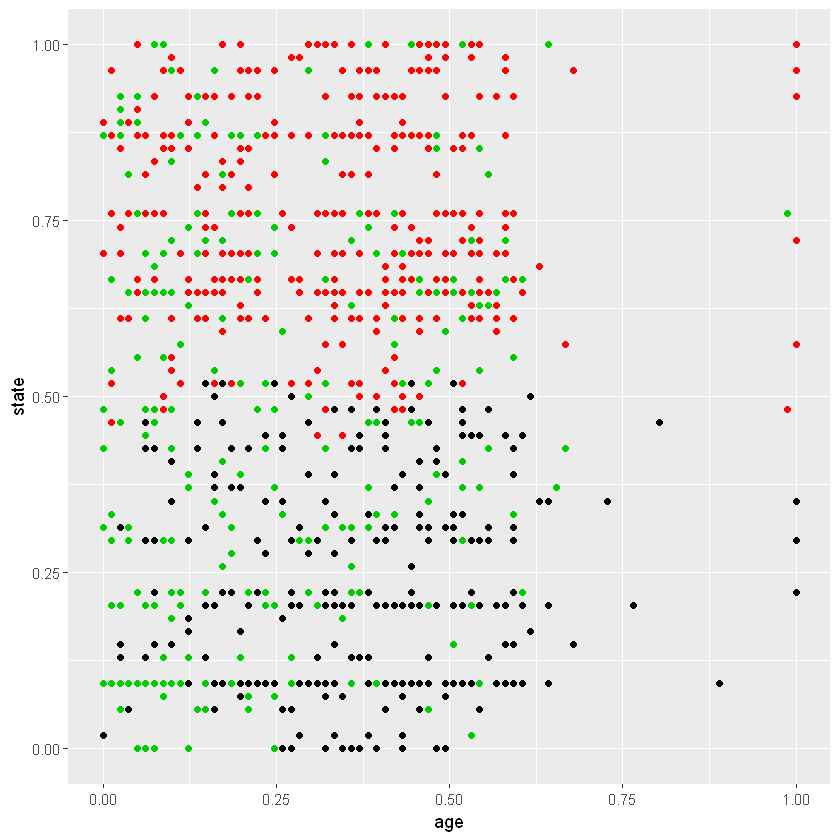

In [55]:
#plot(data[c("emplnw", "stud")], col=km$cluster)
ggplot(data,aes(x=age,y=state))+geom_point(color=km$cluster)

# Performing K means algorithm with number of clusters =5

In [56]:
k5<-kmeans(data,5)

In [57]:
k5

K-means clustering with 5 clusters of sizes 174, 200, 170, 241, 196

Cluster means:
      state  emptype1       age     educ2       inc
1 0.2280758 0.2175698 0.2375479 0.3719212 0.2830460
2 0.1829630 0.1992857 0.3637654 0.7314286 0.7862500
3 0.7572985 0.1974790 0.2542484 0.3941176 0.2941176
4 0.7225296 0.1452282 0.3463962 0.6407825 0.8003112
5 0.5870181 0.6581633 0.3536785 0.8228863 0.6549745

Clustering vector:
   4    6   13   16   20   21   24   30   33   34   36   43   44   45   49   50 
   4    5    4    2    2    3    3    5    1    3    3    1    1    5    2    4 
  51   55   57   58   60   65   72   73   77   83   84   87   88   89   91   92 
   5    4    4    1    4    4    1    4    4    2    4    3    2    2    1    5 
  94  101  104  107  108  109  111  117  131  133  141  143  147  148  151  157 
   4    1    2    5    4    2    5    5    3    2    5    4    4    1    3    4 
 160  161  162  167  172  183  184  196  199  206  209  213  216  217  218  221 
   2    5    2   

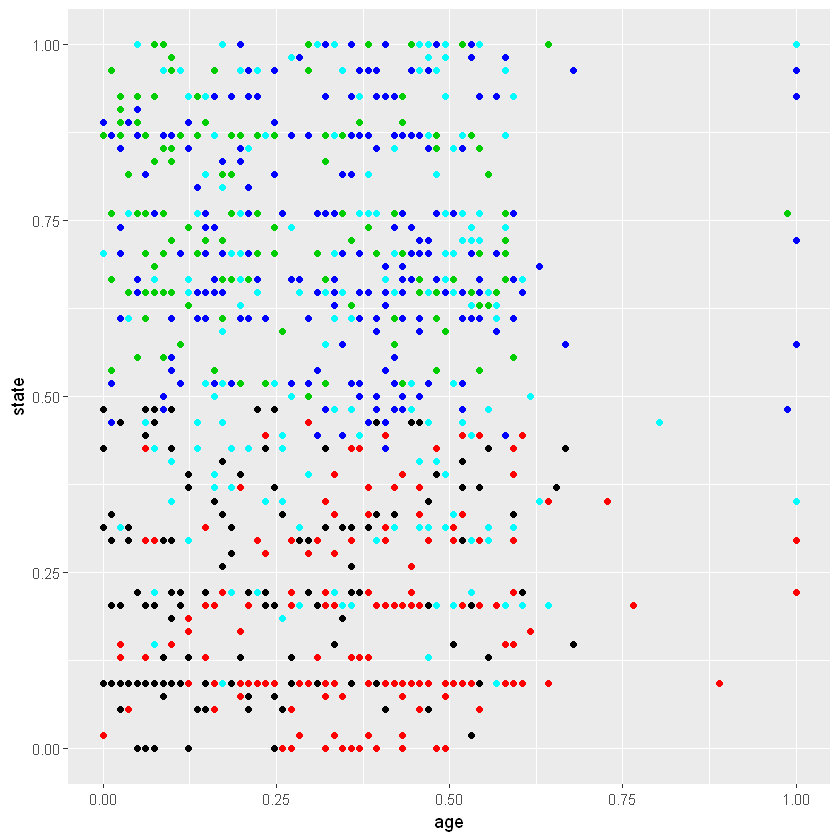

In [58]:
ggplot(data,aes(x=age,y=state))+geom_point(color=k5$cluster)